In [15]:
#問題30の処理を関数化した
def prepare():   
    with open("neko.txt.mecab", "r", encoding='utf-8') as f:
        data = f.readlines()    #各行の読み込み
        data = [line.strip("\n") for line in data]  #全ての行から"\n"を排除

    ans = []    #回答保存用配列

    #各行をループ
    for text in data:
        if text == "EOS":
            break
        dict = {}

        #空白の場合の処理
        if text[0] == " ":
            dict["surface"] = " "
            dict["base"] = " "
            temp = text.split("\t")
            print(temp)
            dict["pos"] =temp[0]
            dict["pos1"] = temp[1]
        #それ以外
        else:
            temp = text.split("\t")
            dict["surface"] = temp[0]
            dict["base"] = temp[1]
            dict["pos"] = temp[2]
            dict["pos1"] = temp[3]
        ans.append(dict)
    return ans

In [16]:
import heapq

data = [i["surface"] for i in prepare()]    #surfaceのみを抽出
data_set = set(data)

word_freq_list = [] #単語と出現頻度の格納配列
#  {"単語", "frequency"} の形で抽出
for i in data_set:
    tmp = {}
    cnt = data.count(i)
    tmp["word"] = i
    tmp["frequency"] = cnt
    word_freq_list.append(tmp)

# frequencyをkeyとしてtop10を取り出す
top10_list = heapq.nlargest(10, word_freq_list, key=lambda x:x["frequency"])

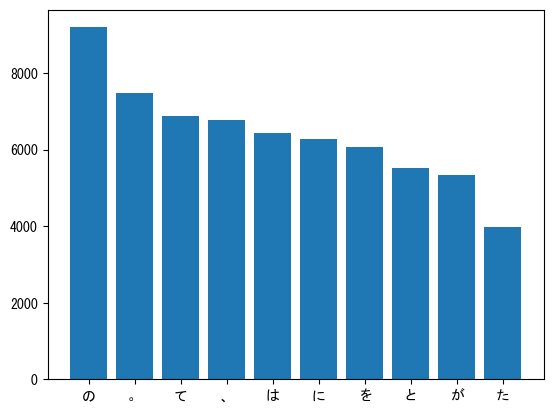

In [17]:
#ここからmatplotlibで棒グラフ描画
import matplotlib as mpl
mpl.rcParams['font.family'] = 'MS Gothic'
import matplotlib.pyplot as plt

left = [data["word"] for data in top10_list]
height = [data["frequency"] for data in top10_list]
plt.bar(x=left, height=height)
plt.show()

**リーダブルコード**  
- P16 具体的な名前を使う
- P19 単語に情報を追加する
- P51 コードを段落に分割する
- P100 説明変数の導入